In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
# Load the Smart_Bin dataset into a pandas DataFrame
df = pd.read_csv('Smart_Bin.csv')

In [3]:
# Print the shape of the dataset to show the number of rows and columns
df.shape

(4638, 10)

In [4]:
# This function replaces missing values in a given column with the median value of that column
def removing_missing_values(column_name):
    df[column_name] = df[column_name].fillna(df[column_name].median())

# We loop through columns 1 through 7 (inclusive) and call the removing_missing_values function on each column
# This will replace missing values in each column with the median value of that column
for i in range(1,8):
    removing_missing_values(df.columns[i])
    i+=1
df

,Class,FL_B,FL_A,VS,FL_B_3,FL_A_3,FL_B_12,FL_A_12,Container Type,Recyclable fraction
0,Emptying,85.3,34.4,6.0,75.9,54.7,83.3,39.8,Silvertop-a,Mixed
1,Emptying,96.2,51.7,8.0,83.3,33.9,85.0,57.4,BIM-3 FTI bottentomd,Non Recyclable
2,Non Emptying,50.9,63.5,5.0,30.8,55.7,51.7,68.5,BIM-3 FTI bottentomd,Recyclable
3,Emptying,83.1,33.9,6.0,91.8,61.1,84.6,43.6,Lindstrom-a,Mixed
4,Non Emptying,73.5,32.2,3.0,68.0,30.5,62.4,53.0,Lindstrom-a,Non Recyclable
...,...,...,...,...,...,...,...,...,...,...
4633,Emptying,51.9,32.0,4.0,59.3,30.8,53.6,33.2,Silvertop-a,Mixed
4634,Non Emptying,62.7,22.7,8.0,68.1,35.5,68.9,31.4,Rectangular,Recyclable
4635,Emptying,53.9,30.2,4.0,52.5,32.5,53.7,34.7,Cubic,Mixed
4636,Non Emptying,84.8,41.2,7.0,81.4,50.4,83.0,40.6,Rectangular,Recyclable


In [5]:
# We import the preprocessing module from the scikit-learn library
from sklearn import preprocessing

# We create a new instance of the LabelEncoder class
label_encoder = preprocessing.LabelEncoder()

# We apply the label encoder to three columns of the dataframe: 'Class', 'Container Type', and 'Recyclable fraction'
# This will encode the categorical values in these columns as numerical values for use in machine learning models
df['Class']= label_encoder.fit_transform(df['Class'])
df['Container Type']= label_encoder.fit_transform(df['Container Type'])
df['Recyclable fraction']= label_encoder.fit_transform(df['Recyclable fraction'])

# We call the describe() function on the dataframe to get summary statistics for all columns
# This will give us information such as the count, mean, standard deviation, and quartiles for each column
df.describe()


,Class,FL_B,FL_A,VS,FL_B_3,FL_A_3,FL_B_12,FL_A_12,Container Type,Recyclable fraction
count,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000,4638.000000
mean,0.509702,68.620073,45.419685,5.117939,68.389845,45.328353,68.702609,45.483161,6.467658,1.001294
std,0.499960,18.090758,14.880283,2.446604,18.111428,14.923608,18.182351,14.759144,3.996835,0.812347
min,0.000000,15.300000,13.800000,1.000000,17.400000,19.300000,16.300000,16.900000,0.000000,0.000000
25%,0.000000,58.400000,32.900000,3.000000,58.900000,32.900000,58.400000,32.900000,3.000000,0.000000
50%,1.000000,69.400000,46.300000,6.000000,69.300000,45.850000,69.300000,47.200000,6.000000,1.000000
75%,1.000000,81.700000,56.400000,7.000000,81.700000,56.575000,81.975000,56.500000,10.000000,2.000000
max,1.000000,198.300000,99.500000,9.000000,154.600000,99.800000,217.400000,96.100000,13.000000,2.000000


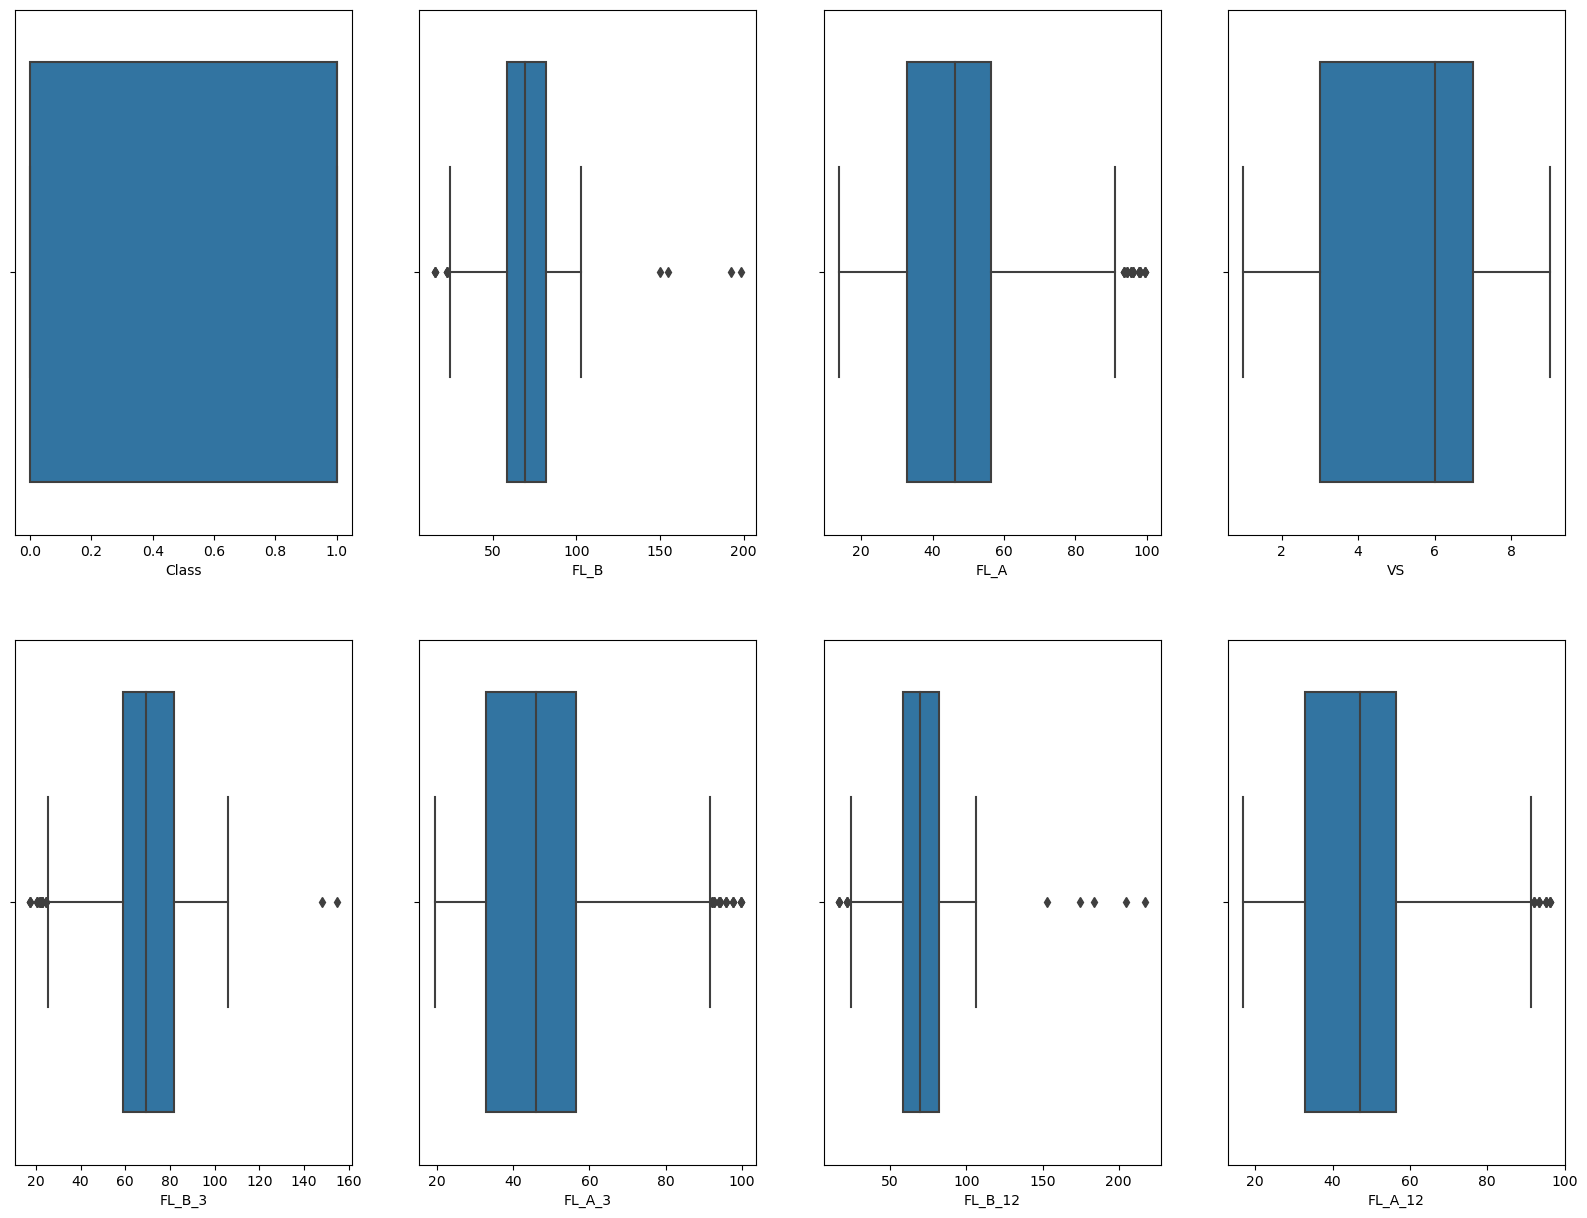

In [6]:
# We import the seaborn library as sns, which provides data visualization tools
import seaborn as sns

# We set the size of the plot to 20x15 inches
plt.figure(figsize=(20,15))

# We create subplots for each of the 8 columns we want to visualize using boxplots
# The first argument to the subplot function specifies the number of rows (in this case, 2)
# The second argument specifies the number of columns (in this case, 4)
# The third argument specifies the position of the current subplot (in this case, it ranges from 1 to 8)
plt.subplot(2,4,1)
sns.boxplot(df['Class'])
plt.subplot(2,4,2)
sns.boxplot(df['FL_B'])
plt.subplot(2,4,3)
sns.boxplot(df['FL_A'])
plt.subplot(2,4,4)
sns.boxplot(df['VS'])
plt.subplot(2,4,5)
sns.boxplot(df['FL_B_3'])
plt.subplot(2,4,6)
sns.boxplot(df['FL_A_3'])
plt.subplot(2,4,7)
sns.boxplot(df['FL_B_12'])
plt.subplot(2,4,8)
sns.boxplot(df['FL_A_12'])

# We call the show() function to display the plot
plt.show()


In [7]:
# We replace any values in the 'FL_B' column that are greater than 100 with the mean of the 'FL_B' column
df['FL_B'].values[df['FL_B'].values > 100] = df['FL_B'].mean()

# We replace any values in the 'FL_B_3' column that are greater than 100 with the mean of the 'FL_B_3' column
df['FL_B_3'].values[df['FL_B_3'].values > 100] = df['FL_B_3'].mean()

# We replace any values in the 'FL_B_12' column that are greater than 100 with the mean of the 'FL_B_12' column
df['FL_B_12'].values[df['FL_B_12'].values > 100] = df['FL_B_12'].mean()

# We replace any values in the 'FL_A' column that are greater than 100 with the mean of the 'FL_A' column
df['FL_A'].values[df['FL_A'].values > 100] = df['FL_A'].mean()

# We replace any values in the 'FL_A_3' column that are greater than 100 with the mean of the 'FL_A_3' column
df['FL_A_3'].values[df['FL_A_3'].values > 100] = df['FL_A_3'].mean()

# We replace any values in the 'FL_A_12' column that are greater than 100 with the mean of the 'FL_A_12' column
df['FL_A_12'].values[df['FL_A_12'].values > 100] = df['FL_A_12'].mean()

# We display the first 5 rows of the modified dataframe
df.head()


,Class,FL_B,FL_A,VS,FL_B_3,FL_A_3,FL_B_12,FL_A_12,Container Type,Recyclable fraction
0,0,85.3,34.4,6.0,75.9,54.7,83.3,39.8,12,0
1,0,96.2,51.7,8.0,83.3,33.9,85.0,57.4,1,1
2,1,50.9,63.5,5.0,30.8,55.7,51.7,68.5,1,2
3,0,83.1,33.9,6.0,91.8,61.1,84.6,43.6,7,0
4,1,73.5,32.2,3.0,68.0,30.5,62.4,53.0,7,1


In [8]:
# We create a new column 'FL_C' in the dataframe by subtracting the values in 'FL_B' from the values in 'FL_A'
df['FL_C'] = df['FL_A'] - df['FL_B']

# We create a new column 'FL_C_3' in the dataframe by subtracting the values in 'FL_B_3' from the values in 'FL_A_3'
df['FL_C_3'] = df['FL_A_3'] - df['FL_B_3']

# We create a new column 'FL_C_12' in the dataframe by subtracting the values in 'FL_B_12' from the values in 'FL_A_12'
df['FL_C_12'] = df['FL_A_12'] - df['FL_B_12']

# We display the first 5 rows of the modified dataframe
df.head()


,Class,FL_B,FL_A,VS,FL_B_3,FL_A_3,FL_B_12,FL_A_12,Container Type,Recyclable fraction,FL_C,FL_C_3,FL_C_12
0,0,85.3,34.4,6.0,75.9,54.7,83.3,39.8,12,0,-50.9,-21.2,-43.5
1,0,96.2,51.7,8.0,83.3,33.9,85.0,57.4,1,1,-44.5,-49.4,-27.6
2,1,50.9,63.5,5.0,30.8,55.7,51.7,68.5,1,2,12.6,24.9,16.8
3,0,83.1,33.9,6.0,91.8,61.1,84.6,43.6,7,0,-49.2,-30.7,-41.0
4,1,73.5,32.2,3.0,68.0,30.5,62.4,53.0,7,1,-41.3,-37.5,-9.4


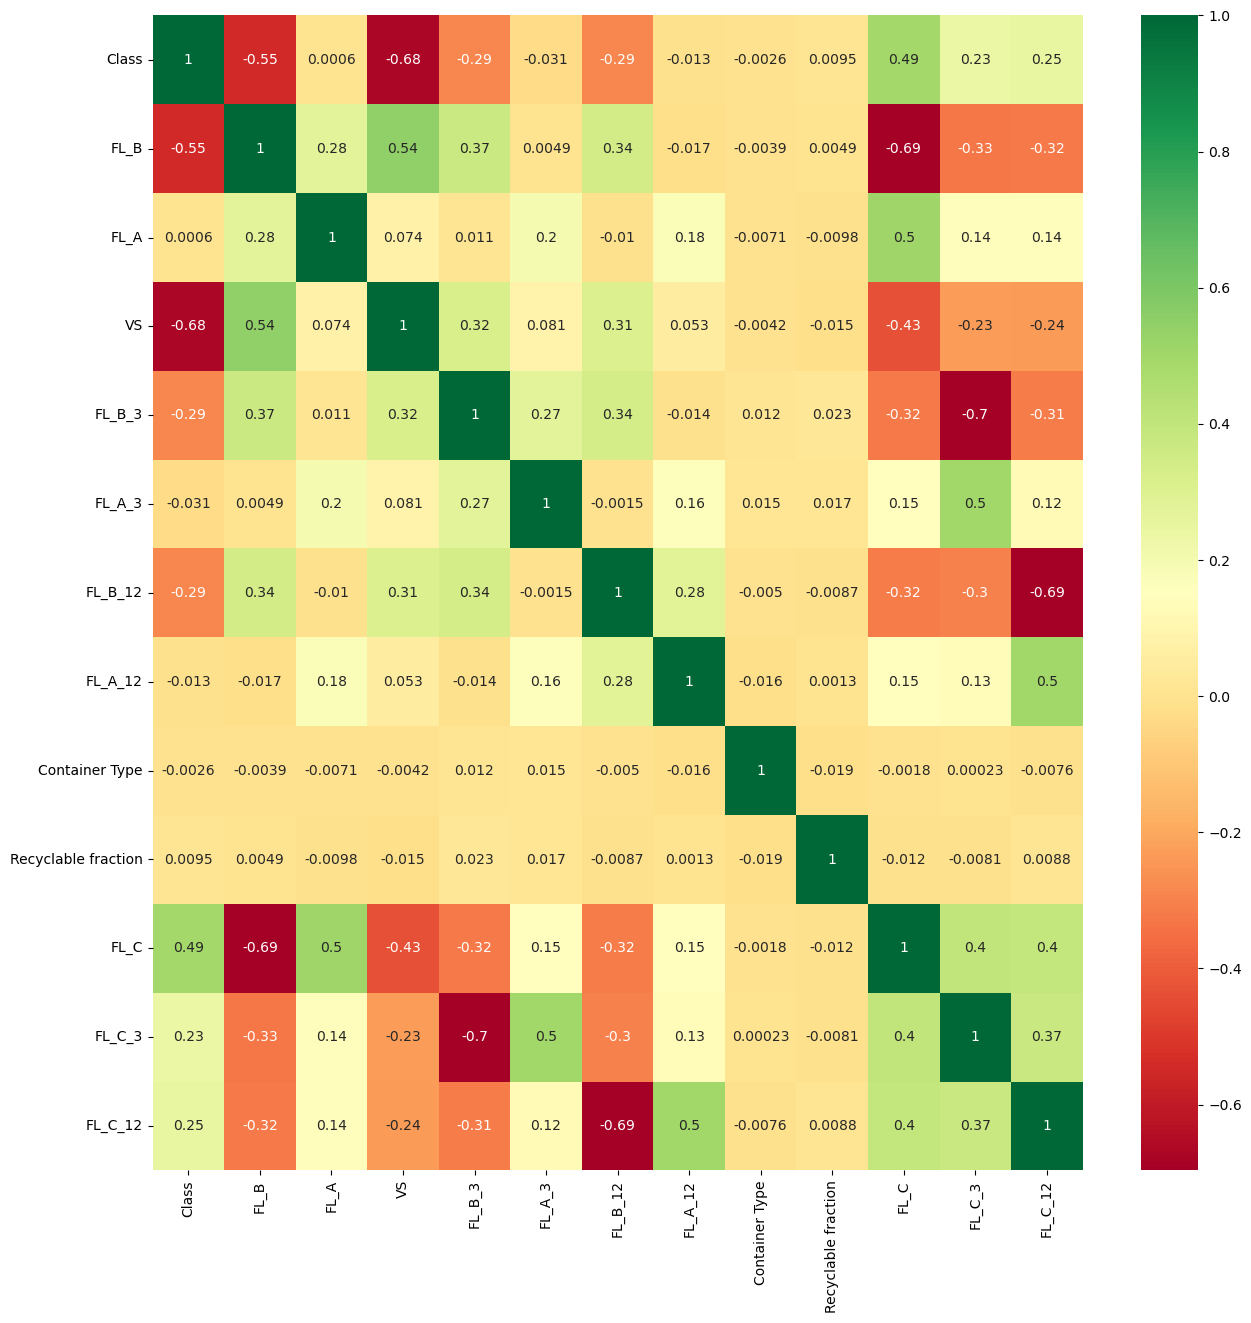

In [9]:
# We compute the correlation matrix between all columns in the dataframe
corrmat = df.corr()

# We get the index of the columns that have the highest correlation with other columns
top_corr_features = corrmat.index

# We create a heatmap of the correlations between the top correlated features, using the 'RdYlGn' color map
plt.figure(figsize=(15,15))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# We display the heatmap
plt.show()


In [10]:
df.to_csv("Dataaftercleaning.csv")